In [345]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
df=pd.read_csv(r"C:\Users\91959\Desktop\codecademy\googleplaystore.csv")

In [347]:
df = df.drop_duplicates(keep="first")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [348]:
# get summary of data
df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Observations:
- there are around 9k apps in the data
- mean rating is >4.
- there are few columns which should have been  numerical

In [349]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Out of the above the following should be numerical:
- reviews
- size
- installs
- price

In [350]:
df["Reviews_conv"] = pd.to_numeric(df["Reviews"], errors='coerce')
df["Size_conv"] = pd.to_numeric(df["Size"], errors='coerce')
df["Installs_conv"] = pd.to_numeric(df["Installs"], errors='coerce')
df["Price_conv"] = pd.to_numeric(df["Price"], errors='coerce')

In [351]:
#checking null values
df.isnull().sum()

App                   0
Category              0
Rating             1465
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Last Updated          0
Current Ver           8
Android Ver           3
Reviews_conv          1
Size_conv         10358
Installs_conv     10357
Price_conv          766
dtype: int64

In [352]:
#size, installs,price and rating show high missing values
# checking missing values
df.loc[df["Installs_conv"].isnull(),"Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', 'Free'], dtype=object)

In [353]:
df.loc[df["Price_conv"].isnull(),"Price"].unique()

array(['$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [354]:
df.loc[df["Size_conv"].isnull(),"Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [355]:
df.loc[df["Rating"].isnull(),"Rating"].unique()

array([nan])

In [356]:
df.loc[df["Rating"].isnull(),"Rating"] = df["Rating"].mean()

In [357]:
# converting price,size and installs
df["Size_conv"]=pd.to_numeric(df["Size"].apply(lambda x: x[:-1]), errors='coerce')
df["Installs_conv"]=pd.to_numeric(df["Installs"].apply(lambda x: x.replace(",","").replace("+","")), errors='coerce')
df["Price_conv"]=pd.to_numeric(df["Price"].apply(lambda x: x[1:]), errors='coerce')

In [358]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Reviews_conv         1
Size_conv         1527
Installs_conv        1
Price_conv        9593
dtype: int64

In [359]:
#checking null values for size and price
df.loc[df["Size_conv"].isnull(),"Size"].unique()

array(['Varies with device', '1,000+'], dtype=object)

In [360]:
# imputing size
df.loc[df["Size"]=="1,000+","Size_conv"]=1000
df.loc[df["Size"]=="Varies with device","Size_conv"]=df["Size_conv"].mean()

In [361]:
df.loc[df["Price_conv"].isnull(),"Price"].unique()

array(['0', 'Everyone'], dtype=object)

In [362]:
# imputing price
df.loc[df["Price"]=="0","Price_conv"]=0
df.loc[df["Price"]=="Everyone","Price_conv"]=df["Price_conv"].mean()

In [363]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
Reviews_conv      1
Size_conv         0
Installs_conv     1
Price_conv        0
dtype: int64

In [364]:
df["Type"].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [365]:
df["paid"] = 0
df.loc[df["Price_conv"]>0,"paid"]=1
df.loc[df["Rating"]>5,"Rating"]=5

In [366]:
#adding revenue column
df["Revenue"] = df["Price_conv"] * df["Installs_conv"]

# Visualizations
- Top 10 apps by number of installs
- Top 10 apps by revenue
- number of installs, rating by type

In [367]:
df["Installs_conv"].sort_values()

4465     0.000000e+00
9337     0.000000e+00
9917     0.000000e+00
7434     0.000000e+00
9719     0.000000e+00
             ...     
382      1.000000e+09
3454     1.000000e+09
411      1.000000e+09
2554     1.000000e+09
10472             NaN
Name: Installs_conv, Length: 10358, dtype: float64

In [368]:
d_sorted=df.sort_values('Installs_conv',ascending=False).head(10)

In [369]:
d_sorted

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_conv,Size_conv,Installs_conv,Price_conv,paid,Revenue
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,3419249.0,37.387862,1.000000e+09,0.0,0,0.0
3928,YouTube,VIDEO_PLAYERS,4.3,25623548,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,25623548.0,37.387862,1.000000e+09,0.0,0,0.0
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,4604483.0,37.387862,1.000000e+09,0.0,0,0.0
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,9642112.0,37.387862,1.000000e+09,0.0,0,0.0
1700,Subway Surfers,GAME,4.5,27723193,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,27723193.0,76.000000,1.000000e+09,0.0,0,0.0
3454,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,"1,000,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,2731171.0,37.387862,1.000000e+09,0.0,0,0.0
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,10858556.0,37.387862,1.000000e+09,0.0,0,0.0
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,"1,000,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,7165362.0,37.387862,1.000000e+09,0.0,0,0.0
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,10858538.0,37.387862,1.000000e+09,0.0,0,0.0
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,9643041.0,37.387862,1.000000e+09,0.0,0,0.0


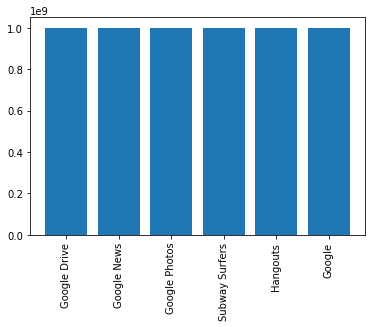

In [370]:
# getting most downloaded apps free

plt.bar(df[df["paid"]==0].sort_values('Installs_conv',ascending=False).head(10)["App"], \
        df[df["paid"]==0].sort_values('Installs_conv',ascending=False).head(10)["Installs_conv"])
plt.xticks(rotation='vertical')
plt.show()

In [371]:
df[df["paid"]==1].sort_values('Installs_conv',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_conv,Size_conv,Installs_conv,Price_conv,paid,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,2376564.0,37.387862,10000000.0,6.99,1,69900000.0
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,"10,000,000+",Paid,$6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,2375336.0,37.387862,10000000.0,6.99,1,69900000.0
4034,Hitman Sniper,GAME,4.6,408292,29M,"10,000,000+",Paid,$0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,408292.0,29.000000,10000000.0,0.99,1,9900000.0
3403,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,"1,000,000+",Paid,$2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,97890.0,14.000000,1000000.0,2.49,1,2490000.0
5631,Five Nights at Freddy's,GAME,4.6,100805,50M,"1,000,000+",Paid,$2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up,100805.0,50.000000,1000000.0,2.99,1,2990000.0
3405,HD Widgets,PERSONALIZATION,4.3,58617,26M,"1,000,000+",Paid,$0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up,58617.0,26.000000,1000000.0,0.99,1,990000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,"1,000,000+",Paid,$6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,348962.0,26.000000,1000000.0,6.99,1,6990000.0
8804,DraStic DS Emulator,GAME,4.6,87766,12M,"1,000,000+",Paid,$4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,87766.0,12.000000,1000000.0,4.99,1,4990000.0
8860,Bloons TD 5,FAMILY,4.6,190086,94M,"1,000,000+",Paid,$2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,190086.0,94.000000,1000000.0,2.99,1,2990000.0
4260,Cut the Rope GOLD,FAMILY,4.6,61264,43M,"1,000,000+",Paid,$0.99,Everyone,Puzzle,"June 19, 2018",3.7.0,4.1 and up,61264.0,43.000000,1000000.0,0.99,1,990000.0


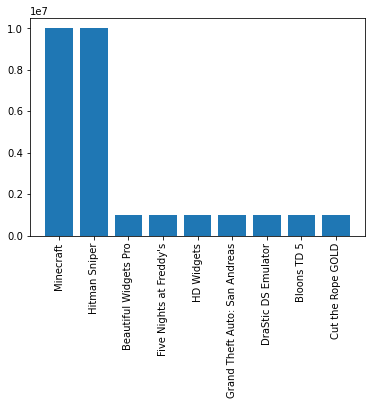

In [372]:
# getting most downloaded apps paid

plt.bar(df[df["paid"]==1].sort_values('Installs_conv',ascending=False).head(10)["App"], \
        df[df["paid"]==1].sort_values('Installs_conv',ascending=False).head(10)["Installs_conv"])
plt.xticks(rotation='vertical')
plt.show()

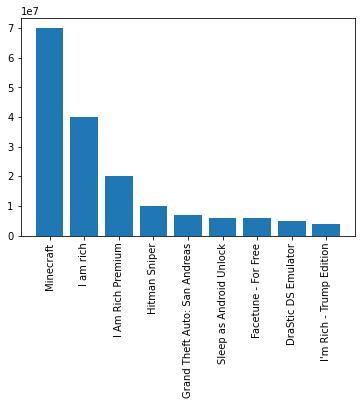

In [373]:
# apps with most revenue

plt.bar(df.sort_values('Revenue',ascending=False).head(10)["App"], \
        df.sort_values('Revenue',ascending=False).head(10)["Revenue"])
plt.xticks(rotation='vertical')
plt.show()

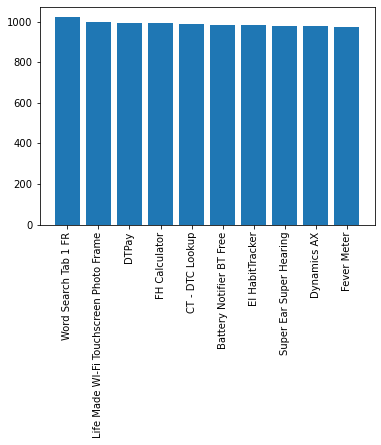

In [374]:
# apps largest by size

plt.bar(df.sort_values('Size_conv',ascending=False).head(10)["App"], \
        df.sort_values('Size_conv',ascending=False).head(10)["Size_conv"])
plt.xticks(rotation='vertical')
plt.show()

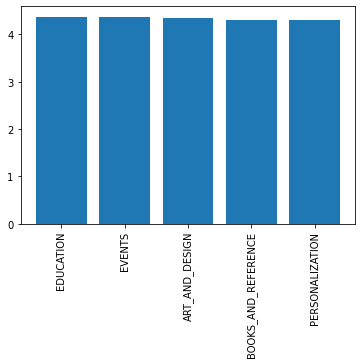

In [389]:
categ = pd.DataFrame(df.groupby('Category')['Rating'].mean().sort_values(ascending=False))
categ = categ.reset_index()
# average rating by category
# apps with most revenue

plt.bar(categ["Category"][1:6],categ["Rating"][1:6])
plt.xticks(rotation='vertical')
plt.show()

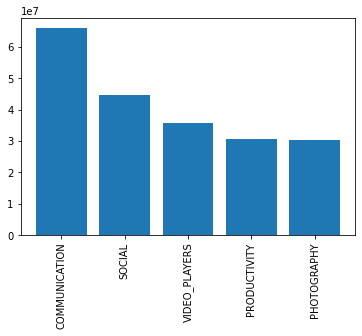

In [376]:
categ = pd.DataFrame(df.groupby('Category')['Installs_conv'].mean().sort_values(ascending=False))
categ = categ.reset_index()
# average rating by category
# apps with most revenue

plt.bar(categ["Category"][0:5],categ["Installs_conv"][0:5])
plt.xticks(rotation='vertical')
plt.show()

In [377]:
# comparing installs by free paid type
(df[df["paid"]==1].describe() - df[df["paid"]==0].describe())/df[df["paid"]==0].describe()*100

,Rating,Reviews_conv,Size_conv,Installs_conv,Price_conv,paid,Revenue
count,-92.014178,-92.024604,-92.014178,-92.024604,-92.014178,-92.014178,-92.024604
mean,1.548653,-97.278804,64.034321,-99.407767,inf,inf,inf
std,3.567596,-95.580472,77.204677,-99.224419,inf,NaN,inf
min,0.000000,NaN,0.000000,NaN,inf,inf,NaN
25%,2.183959,-84.615385,-19.402985,-98.000000,inf,inf,inf
50%,2.380952,-96.082699,0.000000,-99.000000,inf,inf,inf
75%,2.222222,-97.624133,0.000000,-99.800000,inf,inf,inf
max,0.000000,-96.959294,2.615694,-99.000000,inf,inf,inf


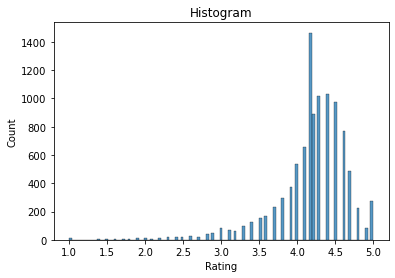

In [378]:
# plotting rating distribution
sns.histplot(data=df, x='Rating');
plt.title("Histogram");

# questions to investigate:
- if free apps earn more than priced apps
- which area has scope for improvement thus new market
- if size of an app is negatively correlated with number of downloads

In [379]:
# correlation between size and number of downloads
df["Installs_conv"].corr(df["Size_conv"])

0.0073073880002774635

In [400]:
# correlation between size and number of downloads
df["Revenue"].corr(df["Size_conv"])

0.0036624526649547532

In [394]:
# correlation between size and number of downloads
df["Rating"].corr(df["Revenue"])

0.009776773296587762

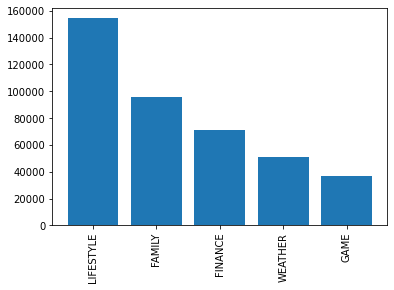

In [380]:
# most profitable apps
categ = pd.DataFrame(df.groupby('Category')['Revenue'].mean().sort_values(ascending=False))
categ = categ.reset_index()
# average rating by category
# apps with most revenue

plt.bar(categ["Category"][0:5],categ["Revenue"][0:5])
plt.xticks(rotation='vertical')
plt.show()

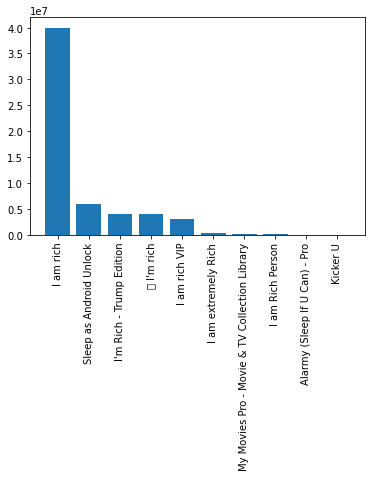

In [392]:
# apps with most revenue

plt.bar(df[df['Category']=="LIFESTYLE"].sort_values('Revenue',ascending=False).head(10)["App"], \
        df[df['Category']=="LIFESTYLE"].sort_values('Revenue',ascending=False).head(10)["Revenue"])
plt.xticks(rotation='vertical')
plt.show()

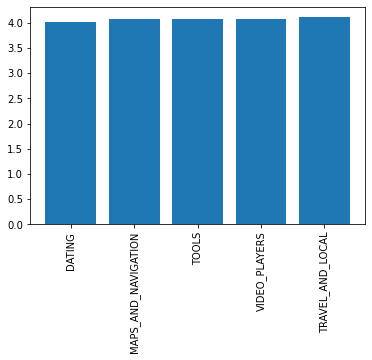

In [381]:
# lowest rating apps
categ = pd.DataFrame(df.groupby('Category')['Rating'].mean().sort_values(ascending=True))
categ = categ.reset_index()
# average rating by category
# apps with most revenue

plt.bar(categ["Category"][0:5],categ["Rating"][0:5])
plt.xticks(rotation='vertical')
plt.show()

In [397]:
df[df["paid"]==1].describe()

,Rating,Reviews_conv,Size_conv,Installs_conv,Price_conv,paid,Revenue
count,766.000000,7.650000e+02,766.000000,7.650000e+02,766.000000,766.0,7.650000e+02
mean,4.248186,1.190055e+04,58.556008,9.049135e+04,13.938683,1.0,4.803554e+05
std,0.499710,1.237318e+05,152.919270,6.458706e+05,58.370647,0.0,3.974358e+06
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.990000,1.0,0.000000e+00
25%,4.189542,6.000000e+00,5.400000,1.000000e+02,1.490000,1.0,2.990000e+02
50%,4.300000,9.000000e+01,20.000000,1.000000e+03,2.990000,1.0,4.990000e+03
75%,4.600000,1.357000e+03,37.387862,1.000000e+04,4.990000,1.0,6.990000e+04
max,5.000000,2.376564e+06,1020.000000,1.000000e+07,400.000000,1.0,6.990000e+07
